# INTRODUCTION

Countries around the world are starting to take action to fight the harmful effects of anthropogenic climate change. A focus for climate scientists and policy makers alike is to reduce the amount of CO2 that is emitted into the atmosphere. One of the largest contributors to CO2 emissions is the transportation system, which in the United States is responsible for 29 percent of total CO2 emissions [@epa2021]. Emissions are driven by the reliance on fossil fuel products as the primary transportation fuel source. High greenhouse gas (GHG) emissions are exacerbated by driving patterns in the United States, which tend to mean longer travel distances than other countries [@itf2021]. The high attribution of transportation sector GHG emissions to fossil fuels means that vehicle electrification is widely regarded as a critical tool for climate change mitigation [@musti2011]. Scenario analyses find that aggressive targets are required to increase vehicle electrification in the United States, with some plans coming close to 95% of vehicles being electric by 2050 [@larson2021]. Less aggressive plans assume a 60% 2050 electric vehicle market share. Despite these findings, the pace of plug-in electric vehicles (PEVs) adoption - defined as the combination of battery-electric and plug-in electric hybrid vehicles - remains well below the necessary level to mitigate climate change impacts.

Adoption is driven by a number of factors related to vehicle properties, such as price, driving range and charging time, and by factors outside of vehicles properties, such as consumer characteristics, fuel prices, and government policy. Purchase price is one of the main factors that influences consumers to purchase electric vehicles. When surveyed about reason why they would choose to not purchase an EV, potential buyers cited the price as the biggest deterrent [@hidrue2011]. Other research has found that drastically increasing vehicle battery size while not changing the price did very little to persuade buyers to purchase PEVs [@adepetu2017]. The least influential factor related directly to the vehicle properties is the charging time. One analysis found that when charging time was reduced from 10 hours to 10 minutes, while changing no other factors, consumers were still more likely to pick gas-powered cars [@hidrue2011].

There are many factors not directly related to electric vehicles that are influential in increasing EV adoption. The strongest of these factors is the price of fuel. One study finds that a 10 percent increase in fuel prices could increase in the market share of hybrid vehicles by as much as 90 percent [@diamond2009]. In addition to fuel prices, the characteristics of consumers influences how electric vehicles are adopted. Characteristics like age and education are among the most significant predictors of how likely a person is to purchase an PEV [@hidrue2011]. Another non-vehicle factor is government policy. Most government policy is targeted at reducing the price of PEVs, but it can encompass many other strategies like creating a more robust charging infrastructure (often termed electric vehicle supply equipment, or EVSE), which is the focus of this paper.

The lack of EVSE is a significant barrier to widespread PEV adoption [@sullivan2021]. A common policy put forward to increase electric vehicle adoption is a federal income tax credit for EV buyers. However, spending similar amounts on increasing deployment of charging stations could yield more effective results [@li2017]. Governments are starting to use this knowledge when drafting spending policy; recently, the US federal government passed an infrastructure bill that allocates roughly \$5 billion to creating a network of charging stations [@thewhitehouse2021-a]. The network of charging stations setup by this spending will be placed along designated roads, particularly the US Interstate System. We begin by defining the relationship between PEV adoption and EVSE as an indirect network effect problem. We then outline two frameworks for causal inference, which provide complementary perspectives on the problem. These methods are applied to the United States using data for the period 2012 to 2020. We provide analysis results, policy conclusions, and outline future work on this topic.


In [1]:
import warnings
warnings.filterwarnings("ignore")
# import data packages
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from PIL import Image
# import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.ticker as mtick
import mapclassify as mc
import geoplot.crs as gcrs
import geoplot as gplt
from geopy.geocoders import Nominatim
from shapely.geometry import Point
# import statistics packages
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from libpysal.weights import Queen
#from nonlincausality.nonlincausality import nonlincausalityMLP, nonlincausalityGRU, nonlincausalityLSTM, nonlincausalityNN, nonlincausalityARIMA
from causal_curve import Mediation
from causal_curve import GPS_Regressor
# import assorted packages
import os
import datetime
import random
import itertools
pd.set_option('display.max_columns', None)
sns.set_theme(style="white")

# setting publish to true skips time consuming data generation tasks and assumes data are being loaded from a previous run
publish = True

# THE ELECTRIC VEHICLE AND CHARGING STATION PROBLEM

Electric vehicle ownership is often referenced as exhibiting a "chicken and egg" behavior arising from the supply and demand relationship. Individual demand for electric vehicles is influenced by the available charging stations supply. Consumers are unwilling to purchase vehicles due to range anxiety and a perceived lack of charging stations. Suppliers are not incentivized to provide charging stations unless there is sufficient demand to warrant their cost. In more formal language, the problem represents a indirect network effect. Similar dynamics exist in other markets - e.g., consumers choose online streaming video services based on their offerings, but service providers require capital from subscriptions in order to generate content. There is a clear role for public policy in such situations when a public good results from intervention in the market. Many governments may deem PEVs as a solution to a public ill (i.e., climate change) and can incentivize either suppliers by providing installation subsidies or consumers by installing charging stations. While the problem has been recognized in the literature [@melliger2018], empirical analysis is minimal.

Zhou and Li [@zhou2018] find that government spending on EVSE deployment is most effective in the early stages of PEV market penetration. These early markets may have critical-mass constraints, which can be overcome by a government subsidy that deals with the network effect. Subsidies for charging stations are found to be more effective than those for PEV purchases because early PEV adopters have a low-price sensitivity[@li2017]. Early adopters are eager to purchases PEVs, which makes them more willing to pay higher prices. The main consumer concern at this stage is the ability to recharge their vehicle - that is, the existing EVSE environment. Because of this, understanding consumer's preferences for charging station infrastructure is crucial. Sheldon et al. [@sheldon2019] find that consumers are willing to pay about 5 cents per mile for plug-in electric vehicles and about 10 cents per minute of wait time while refueling. Consumers are also willing to wait up to 8 minutes longer during refueling relative to the time for conventional fossil fuel vehicles. Knowing this information can allow policy makers to create subsidy programs that produce more effective outcomes.

An important feature when considering an electrified mobility system is how its refueling infrastructure differs from the conventional fossil fuel-based system. In the conventional private mobility system, the individual owns the vehicle and purchases fuel from centralized and privately owned refueling stations. These vehicles typically have a greater driving range associated with them. While the increased range increases a vehicle's mobility, refueling at a place of residence is not viable. Electric vehicles do not have as great of a driving range as gas-powered vehicles. However, electric vehicles may be charged in the home using previously existing electrical infrastructure. The presence of charging points in the home begs the questions 1) if (or to what extent) out-of-home charging stations are required for travel, and 2) to what extent is range anxiety a perception versus a reality.

According to the Bureau of Transportation Statistics, 98% of trips made in the US are less than 50 miles [@vehicletechnologyoffice2022]. Given that most battery-electric vehicles (BEVs) have a range greater than 200 miles [@elfalan2021], it is feasible to make most trips on a single charge. However, long-distance trips (over 50 miles) comprise 30% of total vehicle-miles traveled (VMT) [@aultman-hall2018]. There is clearly a need for out-of-home charging stations to accommodate these trips. Even if most trips can be accommodated by in-home charging, the vehicle purchase decision will be influenced by consideration of these longer trips that require charging stations [@silvia2016]. Additionally, Wolbertus et al. [@wolbertus2018] find that there is still a demand for charging stations in places where public daytime charging is the only option, such as at the workplace.

We contribute to this literature by providing among the first and most extensive examinations of the co-evolving PEV and EVSE systems. Zhou and Li [@zhou2018] used data for 2011-2013 vehicle sales and EVSE for 353 US metropolitan aras, which we are able to expand to include a longer time horizon (2012-2020) and wider spatial extent (all counties in the United States). Further, we combine two causal inference approaches to capture both the phasing and causal relationship between these markets.

# METHODS

We define two classes of causality which we termed as phasing causality and potential outcomes causality. These alternative forms of causality are often denoted by their principle developers: Granger causality [@granger1969] and Rubin causality [@rubin2005], respectively. Both approaches are employed due to the (functionally) continuous nature of the two variables of interest. We detail each approach and its application to the present problem below.

## Non-Linear Phasing Causality

Define two variables $X_t$ and $Y_t$ where subscript $t$ denotes a time series process. Phasing causality seeks to identify whether the two time series exhibit a common pattern (or coherence). One variable may lead the other producing a time lag, but the series may also exhibit instantaneous *causality* whereby the current value of $Y_t$ is better predicted when the current value of $X_t$ is included in the model. In strict terms, phasing causality is defined by $$\sigma^2(Y|U)<\sigma(Y|\overline{U-X})$$ {#eq:granger-causality}. There is also the potential for feedback, whereby $X_t$ causes $Y_t$ and $Y_t$ also causes $X_t$. In the EV and charging station situation, this might mean that EVSE installations encourage households in a county to purchase PEVs, which then encourages further investment in EVSE infrastructure. There are two key principles underling phasing causality: 1) that the cause occurs before its effect and 2) that the cause has unique information about the future values of its effect. Granger defines a simple test statistic for such causality using time series data using the F-test.

The original applications of Granger causality were to economic variables that fluctuated over time. The test assumes that both $X_t$ and $Y_t$ are stationary time series, an assumption that will be shown to be violated in the present case. Several extensions have been developed to phasing causality that allow for non-stationary time series. We use the approach of Rosol et al. [@rosol2022] with modifications to fit our application as detailed in the following section. Their approach compares the model median absolute error using both time series ($Y_t$ and $X_t$)to that obtained using only the dependent time series ($Y_t$). The Wilcoxon signed-rank test is used to test for statistical significance - i.e., that $X_t$ causes $Y_t$. The method is implemented as a Python package and includes multilayer perceptron (MLP), long short-term memory (LSTM), gated recurrent unit (GRU), neural net (NN), and autoregressive integrated moving average (ARIMA) models. Model errors are calculated at each observation and the sum of their absolute values used in the statistical test. The method has the ability to measure changes in causality over time, but our time series is too short for its application.

## Potential Outcomes Causality Via Propensity Score Matching

Potential outcomes causality begins from the definition that causal effects are a comparison between outcomes $Y$ in response to differences in a treatment $T$ on a common set of units. Unfortunately, such an analysis is not possible in reality since it would require the same unit (e.g., person) to simultaneously experience both the treated and untreated conditions. In observational studies, a common approach is to identify two sets of observational units that differ only in their exposure to a treatment variable of interest. A study interested in the effect of a new teaching strategy might compare two sets of schools that differ only in whether they adopted the strategy. A class of strategies to identify otherwise similar observational units (e.g., schools) is propensity score matching. Formally, the assumption is that $Y_t \perp T|X_t$, or that outcome $Y_t$ is independent of the treatment conditional upon a set of $X_t$ covariates. That is, treatment assignment is ignorable conditional on $X_t$. However, for the present problem the treatment (i.e., charging stations) is not binary. An observation unit may have any number of charging stations.

An extension to the standard propensity score, termed as generalized propensity score (GPS) matching, was developed by Hirano and Imbens [@hirano2005]. Assuming a continuous treatment, the GPS is defined by $$r(t,x)=f_{T|X}(t|x)$$ {#eq-gps} where $t\in \tau$ is referred to as the unit-level dose-response function, $X$ and $T$ are random variables defined on a common probability space, and $r(t,x)$ is the GPS measure defining similarity between observational units. It can then be stated that $X\perp 1{T=t}|r(t,X)$, or that assignment to a treatment value $t$ is independent conditional on its GPS.

The dose-response nomenclature is taken from pharmeutical research, where the interest is in the health response to a continuous drug dose. Each individual has a potential response at different doses, or treatment levels. The dose-response function that is an outcome of continuous GPS analysis is an average of the potential responses at each treatment level - an average dose-response function (ADRF). A challenge when transitioning from a binary to a continuous treatment is that a treated unit will not be available at every treatment level. The problem can be addressed by parameterizing the curve as a linear combination of a finite number of basis functions [@galagate2016]. The averaging used to construct the ADRF is based on weighting observations by the GPS using units within each basis function range.

## Casual Mediation

A secondary question is the potential relationship between charging stations and other variables of interest. These relationships can be illustrated via a directed acyclic graph (DAG) as shown in @fig-dag where $X$ is a treatment variable, $Z$ is a mediating variable, and $Y$ is an outcome variable [@imai2009].


```{dot}
//| label: fig-dag
//| fig-cap: Directed Acyclic Graph (DAG) for Causal Mediation
digraph {
  rankdir=LR;
  X -> Y;
  X -> Z;
  Z -> Y;
}
```


Conventional causal mediation modeling takes the form of a linear structural equation model (SEM). Extending the above notation, $M_t$ is a mediation variable. Following the potential outcomes framework, suppose we are interested in the mediating effect of EVSE investments on grid decarbonization. In many cases, utility operators provide financial support for EVSE. Limited budgets mean that a private firm or government agency may need to balance investments in both infrastructures. Previously, the potential outcome depended only on the treatment variable but now depends on both the treatment and mediator variables as \$Y(t,m)\$. Also, assume there is no interference effect meaning that mediator values for one observation do not affect the treatment value for other observations, and vice versa. The causal mediation (indirect) effect for each observation is then given by $$\delta(t)=Y(t,M(1)-M(0)$$ {#eq-med} where $M(1)$ and $M(0)$ are the potential mediator variable values with and without the treatment. The mediation effect is interpreted based on the difference between $M(1)$ and $M(0)$ holding the treatment fixed at \$t\$. If $M(1)=M(0)$ - i.e., the treatment has no effect on the mediator variable - then the causal mediation effect is zero. Again, we use a generalized additive model (GAM) to test a nonparametric average mediation effect.

# DATA AND MODEL SPECIFICATION


In [2]:
#  https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [3]:
def impute_veh_regs(df):
    geo_ct = df.GEOID.value_counts()==4
    cty_list = np.unique(df[df.GEOID.isin(geo_ct[geo_ct].index)].GEOID.values) # record count is 4 for the county
    yr_set = set([2012,2014,2016,2018,2020])
    for cty in cty_list:
        temp = df[df.GEOID==cty]
        miss_yr = (yr_set-set(temp.YEAR)).pop()
        row = temp.iloc[0].copy() # initialize new row to the first row in dataset
        row.loc["YEAR"] = miss_yr
        if(miss_yr==2012):
            row[~row.index.isin(["GEOID","YEAR"])] = np.reshape(temp.loc[temp.YEAR==2014,~temp.columns.isin(["GEOID","YEAR"])].values - (temp.loc[temp.YEAR==2016,~temp.columns.isin(["GEOID","YEAR"])].values - temp.loc[temp.YEAR==2014,~temp.columns.isin(["GEOID","YEAR"])].values),-1)
        elif(miss_yr==2020):
            row[~row.index.isin(["GEOID","YEAR"])] = np.reshape(temp.loc[temp.YEAR==2018,~temp.columns.isin(["GEOID","YEAR"])].values + (temp.loc[temp.YEAR==2018,~temp.columns.isin(["GEOID","YEAR"])].values - temp.loc[temp.YEAR==2016,~temp.columns.isin(["GEOID","YEAR"])].values),-1)
        else:
            row[~row.index.isin(["GEOID","YEAR"])] = np.reshape((temp.loc[temp.YEAR==(miss_yr+2),~temp.columns.isin(["GEOID","YEAR"])].values + temp.loc[temp.YEAR==(miss_yr-2),~temp.columns.isin(["GEOID","YEAR"])].values)/2,-1)                                       
        df = pd.concat((df,row.to_frame().T),ignore_index=True)
    return(df)

In [4]:
def fill_station_lags(df, id_col, yr_col, ch_col):
    cty_list = np.unique(df[:,id_col])
    for cty in cty_list:
        temp = df[df[:,id_col]==cty]
        yr_list = temp[:,yr_col]
        yr_set = set(yr_list)
        i = 0
        for yr in range(2012,2021,1):
            if(yr>np.min(yr_list)): # if the year is after the first installation year (prior years will be autofilled as zero when merged with registration data)
                if(yr not in yr_list): # if the year isn't in the list of years for the county
                    row = temp[i].copy()
                    row[yr_col] = yr
                    row[ch_col:ch_col+2] = 0 # no stations installed in this year
                    row_mat = row[np.newaxis]
                    df = np.vstack((df,row_mat))
                else:
                    i+=1 # update previous row id if the year is in temp df
    return(df)

In [5]:
# load in state population totals
df_pop = pd.read_csv("../Data/Census/PopByState/state_pop_est_2019.csv")
df_pop['STATE'] = df_pop['Geographic Area'].map(us_state_to_abbrev)
if publish:
    gdf = pd.read_parquet("../Data/combined_data.parquet")
    geo_ch_stn = gpd.read_parquet("../Data/geo_charge_stations.parquet")
else:

    # load county shapefile
    US_sf = gpd.read_file("../Data/GIS/cb_2018_us_county_5m/cb_2018_us_county_5m.shp")
    #Removing the outlying islands and other territories. 
    US_sf["STATEFP"] =pd.to_numeric(US_sf["STATEFP"])
    US_sf = US_sf[US_sf['STATEFP'] < 57]
    US_sf = US_sf.to_crs(2163)

    # load charging station data
    df_ch_stn = pd.read_csv("../Data/Transport/alt_fuel_stations_w_county.csv")
    print("df_ch_stn all",df_ch_stn.shape[0])
    print("df_ch_stn no private",df_ch_stn.shape[0])
    df_ch_stn = df_ch_stn[pd.notnull(df_ch_stn["Open Date"])]
    print("df_ch_stn (after removing nan open year",df_ch_stn.shape[0])
    df_ch_stn = df_ch_stn.assign(YEAR=pd.to_datetime(df_ch_stn.loc[:,'Open Date']).dt.year.astype(int))
    #df_ch_stn = df_ch_stn.drop(columns="Open Date")
    df_ch_stn = df_ch_stn[df_ch_stn.STATEFP<=56]
    id_col = df_ch_stn.columns.get_loc("GEOID")
    yr_col = df_ch_stn.columns.get_loc("YEAR")
    ch_col = df_ch_stn.columns.get_loc("EVSE-L01")
    df_ch_stn = pd.DataFrame(data=fill_station_lags(df_ch_stn.values, id_col, yr_col,ch_col), columns=df_ch_stn.columns)
    geometry = [Point(xy) for xy in zip(df_ch_stn.Longitude, df_ch_stn.Latitude)]
    crs = {'init' :'epsg:2163'}
    gdf_ch_stn = gpd.GeoDataFrame(df_ch_stn, crs=crs, geometry=geometry)
    grp_ch_stn = df_ch_stn.groupby(["GEOID","YEAR"]).sum()[["EVSE-L01","EVSE-L02","EVSE-L03"]].reset_index()
    gdf_ch_stn.to_parquet("../Data/geo_charge_stations.parquet")
    grp_ch_stn["cEVSE-L01"]=grp_ch_stn[["GEOID","EVSE-L01"]].groupby("GEOID").cumsum()
    grp_ch_stn["cEVSE-L02"]=grp_ch_stn[["GEOID","EVSE-L02"]].groupby("GEOID").cumsum()
    grp_ch_stn["cEVSE-L03"]=grp_ch_stn[["GEOID","EVSE-L03"]].groupby("GEOID").cumsum()
    grp_ch_stn["cEVSE"]=grp_ch_stn["cEVSE-L01"]+grp_ch_stn["cEVSE-L02"]+grp_ch_stn["cEVSE-L03"]

    # load vehicle registrations data
    df_veh_reg = pd.read_parquet("../Data/Transport/Experian Registrations/sum_registrations.parquet")
    # print("Pos1:",df_veh_reg.groupby("GEOID").count()["YEAR"].value_counts())
    df_veh_reg.rename(columns={"year":"YEAR"},inplace=True)
    # fill nan with zero and aggregate electricity columns
    df_veh_reg.fillna(0, inplace=True)
    df_veh_reg = impute_veh_regs(df_veh_reg)
    df_veh_reg = df_veh_reg.assign(bev=df_veh_reg["24kw Electric~Electric"]+df_veh_reg["60kw Electric~Electric"]+df_veh_reg["85kw Electric~Electric"]+df_veh_reg["90kw Electric~Electric"]+df_veh_reg["Electric"]+df_veh_reg["Electric Fuel System"])
    df_veh_reg = df_veh_reg.assign(pev=(df_veh_reg["bev"]+df_veh_reg["Plug-In Hybrid"]))
    # percent bev is bev/total vehicles
    df_veh_reg = df_veh_reg.assign(per_bev=df_veh_reg["bev"] / df_veh_reg["All"])
    # percent pev is (bev+phev)/total vehicles
    df_veh_reg = df_veh_reg.assign(per_pev=df_veh_reg["pev"] / df_veh_reg["All"])
    
    # combine registration and charging data by year and county code
    df = df_veh_reg.merge(grp_ch_stn.loc[:,["GEOID","YEAR","cEVSE-L01","cEVSE-L02","cEVSE-L03","cEVSE"]],how="left",on=["GEOID","YEAR"])
    # add additional columns for lagged charging station counts
    df["lag_year"] = df.YEAR-1
    df = df.merge(grp_ch_stn.loc[:,["GEOID","YEAR","cEVSE-L01","cEVSE-L02","cEVSE-L03","cEVSE"]],how="left",left_on=["GEOID","lag_year"],right_on=["GEOID","YEAR"],suffixes=("","_lag"))
    df["GEOID"] = df["GEOID"].astype(int)
    
    # read in demographic data by county and add to main dataframe
    df_pop11 = pd.read_csv("../Data/Census/county_pop_race_age_2011_2015.csv")
    df_pop15 = pd.read_csv("../Data/Census/county_pop_race_age_2015_2019.csv") 
    df_dem = pd.read_csv("../Data/Census/county_race_income.csv")
    df_dem["Percent_Minority"] = (df_dem["ADK5E004"]+df_dem["ADK5E005"]+df_dem["ADK5E007"]+df_dem["ADK5E012"]+df_dem["ADK5E008"])/df_dem["ADK5E001"]
    df_dem.loc[df_dem.YEAR==2012,"ABDPE001"] = df_dem.loc[df_dem.YEAR==2012,"ABDPE001"]*1.08 # adjust to 2019$ rather than 2014$ https://data.bls.gov/cgi-bin/cpicalc.pl?cost1=1.00&year1=201411&year2=201911
    df_dem14 = df_dem[df_dem.YEAR==2012]
    df_dem14 = df_dem14.assign(YEAR=2014)         
    df_dem18 = df_dem[df_dem.YEAR==2016]
    df_dem18 = df_dem18.assign(YEAR=2018)  
    df_dem20 = df_dem[df_dem.YEAR==2016]
    df_dem20 = df_dem20.assign(YEAR=2020)  
    df_dem = pd.concat((df_dem,df_dem14,df_dem18,df_dem20))

    # read in egrid data and add to main dataframe
    df_egrid = pd.read_csv("../Data/eGrid/egrid_data_co2.csv")

    # read in elections data and add to main dataframe
    df_elec = pd.read_csv("../Data/Elections/county_pres_2020.csv")
    df_elec = df_elec[df_elec.PARTY=="DEMOCRAT"]
    df_elec.drop(columns="PARTY",inplace=True)
    df_elec["percent_dem"] = df_elec.CAND_VOTES/df_elec.TOT_VOTES
    
    # add data for fuel prices
    df_fuel = pd.read_csv("../Data/Transport/fuel_prices.csv")

    # join demographics to main dataframe for 2011 to 2015
    df11 = df.loc[df.YEAR<2015,:].merge(df_pop11, how="left", on="GEOID")
    # update data for YEAR 2015 forward to use the 2015-2019 data
    df15 = df.loc[df.YEAR>=2015,:].merge(df_pop15, how="left", on="GEOID")
    df = pd.concat((df11,df15),axis=0)
    df = df.merge(df_dem,how="left",on=["GEOID","YEAR"])
    # some data are assigned county codes that don't appear in the population dataset. They should be removed for analysis.
    df.dropna(axis=0,subset="ALUBE001", inplace=True)
    # join egrid and elections data to main dataframe
    df = df.merge(df_elec, how="left",on="GEOID")
    df = df.merge(df_egrid, how="left", left_on=["STATEA","YEAR"], right_on=["FIPSST","YEAR"])

    # calculate per capita statistics (per 100,000 persons)
    df["bev_cap"] = (df["bev"]/df["ALUBE001"])*100000
    df["pev_cap"] = (df["pev"]/df["ALUBE001"])*100000
    df["cEVSE-L01_cap"] = (df["cEVSE-L01"]/df["ALUBE001"])*100000
    df["cEVSE_L02_cap"] = (df["cEVSE-L02"]/df["ALUBE001"])*100000
    df["cEVSE_L03_cap"] = (df["cEVSE-L03"]/df["ALUBE001"])*100000
    df["cEVSE_cap"] = (df["cEVSE"]/df["ALUBE001"])*100000
    df["cEVSE_cap_lag"] = (df["cEVSE_lag"]/df["ALUBE001"])*100000

    df.fillna(0,inplace=True) # careful using a blanket fillna statement on a dataframe
    df.sort_values(by=["GEOID","YEAR"],inplace=True)
    temp = df.GEOID.value_counts()==5 # data available for all years. Some remote areas and reservations do not have data available for all years

    df = df[df.GEOID.isin(temp[temp].index.get_level_values(0).values)]
    temp = df.groupby("GEOID").sum()[["cEVSE_cap","pev_cap"]]
    temp = temp[(temp.cEVSE_cap>0)&(temp.pev_cap>0)]
    # Remove counties with no pev and no chargers (N=)
    print("Number counties with no pev or chargers in any year=", pd.unique(df.GEOID).shape[0]-temp.shape[0],"Number counties in dataset after filtering=",pd.unique(df.GEOID).shape[0], "All counties in registrations=",pd.unique(df_veh_reg.GEOID).shape[0])
    df = df[df.GEOID.isin(temp.index.get_level_values(0).values)] # filter out counties where there are no PEVs or charging stations in any analysis year

    # additional data from GIS file for county
    US_sf["GEOID"] = US_sf["GEOID"].astype(int)
    gdf = US_sf.merge(df, how="right", on="GEOID")
    # join the fuel price data to main dataframe
    gdf = gdf.merge(df_fuel, on=["STATE","YEAR"])
    gdf.YEAR = gdf.YEAR.astype(int)

In [6]:
if not publish:
    check_reg = pd.read_parquet("../Data/Transport/Experian Registrations/sum_registrations.parquet")
    check = check_reg.groupby("GEOID").count()["YEAR"]
    print(check.value_counts())

In [7]:
if not publish:
    w_queen = Queen.from_dataframe(gdf)
    gdf["xW"] = w_queen.sparse*gdf.cEVSE_cap.values

    # add state FE
    gdf["state_year"] = gdf["STATEFP"].astype(str) + "-" + gdf["YEAR"].astype(str)
    gdf = pd.concat([gdf,pd.get_dummies(gdf.state_year, prefix="sy_", drop_first=True)],axis=1)
    gdf.to_parquet("../Data/combined_data.parquet")

## Treatment and Outcome Variables

The two key input datasets are charging station locations provided by the Alternative Fuel Data Center (AFDC) and electric vehicle registrations provided by Experian Inc. The vehicle registration dataset comprises a 10-year panel at 2-year intervals (2012, 2014, 2016, 2018, 2020). Total vehicle registrations are recorded by county, make, model, year, and other vehicle characteristics for the United States. The frequency and spatial resolution of the vehicle registration data define the analysis units. Our treatment and outcome variables are charging stations and EV registrations normalized by population (per 100,000 persons).

Charging stations are geocoded and aggregated into annual cumulative totals by county. Only public charging stations are maintained for analysis. Further, the we make no distinction between charger port capacity (level 1, 2, or 3) when aggregating the number of charging ports per county. Such a distinction could be made as a sensitivity test but may reduce the effective sample size as not all counties with charging stations have all three charger port types.

After filtering out protectorates and other non-state locations, several county codes in the Experian data remain that are missing registration totals in a subset of years (117/3275, or about 4%). We remove county codes with more than one missing year, leaving 34 counties for which registration totals are interpolated from adjacent years. Many of these county codes are for remote areas with low populations (e.g., the Aleutian Islands in Alaska). Of the 3140 viable counties, it is found that 1406 lack EV registrations or public charging stations in any analysis year. These counties are excluded from analysis because they lack variation for model estimation. @fig-missing illustrates that a further 80% of the remaining counties did not have EV registrations in 2012. While kept in the dataset for analysis, the high proportion of zero-valued observations poses a significant challenge for statistical inference.


In [8]:
#| layout-ncol: 1
#| label: fig-missing
#| fig-cap: Counties with no PEV registrations by year

ax = (gdf[gdf.pev_cap==0].groupby("YEAR").count()["pev_cap"]/gdf.groupby("YEAR").count()["pev_cap"]).plot(kind="bar")
ax.set_xlabel('Year')
ax.set_ylabel('Percent Total')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation = 0)
plt.show()

<Figure size 432x288 with 1 Axes>

## Covariates

Census data was compiled to construct county-level statistics for median income and racial composition. Five-year American Community Survey (ACS) data were used to approximate annual variation. We use the 2011-2015 ACS for years 2012 and 2014 and the 2016-2020 ACS for years 2016, 2018, and 2020. For the purposes of analysis, we define minority racial groups as Black and Hispanic based on an overrepresentation of poverty according to Census Bureau analysis [@uscensusbureau2020]. We also include American Indian and Alaska native, and Native Hawaiian and Other Pacific Island, and Other Race Not Specified in our definition.

To capture spatial spillover effects, a Queen contiguity matrix is constructed for charging station density (per 100,000 persons) in adjacent counties. The rationale is that an individual may purchase an EV if there are charging stations in adjacent counties and charge at their residence when driving in their home county. This specification is termed a *spatial lag in X* model in the spatial econometric literature [@elhorst2017]*.*

Several studies [@sheldon2019; @li2017] find that gas price at the pump is an important factor for PEV adoption. We construct a fuel price variable using annual average prices for the United States provided by the EIA [@eia2022]. We adjust these totals to account for state variation using current state-level averages provided by AAA [@aaa2022]. Prices are then adjusted to 2020 dollar to ensure consistent parameter inference.

## Model Specification

We use the causal-curve Python package developed by Kobrosly [@kobrosly2020] for potential outcomes causal inference. This package uses a generalized linear model (GLM) to construct the GPS and a generalized additive model (GAM) to estimate the dose-response curve. The GAM model takes as inputs the GPS, a treatment grid, and a number of splines. We use the default 100 unit grid and 30 splines (i.e., separating the GPS space using 30 basis functions). The model includes state-year fixed effects to account for unobserved policy variation and approxiamte autocorrelation between observations for the same county. Extensions to this model formulation are left for future work.

Causal mediation is explored for two variables. First, we consider the mediating effect of EVSE on grid carbon intensity. We use state-level eGrid data available for each analysis year. The treatment variable in this case is state annual $CO_2$ equivalent output emissions measured in lbs per MWh. We hypothesize that public EVSE access may not be as important to PEV adoption as perceived environmental benefit as measured by grid emissions output intensity.

Second, we use 2020 county-level presidential election results as a proxy for local political effects. Climate policies have been more strongly pushed by Democratic presidential administrations, including the recent legislation by the Biden Administration to support PEV charging station infrastructure. Climate policy is also set at the state-level, so gubernatorial election returns are an alternative political variable. However, consistent county-level data were not readily available from a single source. The causal hypothesis is that political affiliation is associated with a proclivity towards environmentally considerations when purchasing a vehicle. A change in EVSE access is a mediating variable on higher Democratic affiliation (as a proxy for public sentiments about the need for climate change action) leading to PEV adoption.

# Results

## Descriptive Analysis

\@fig-us-totals provides a first validation of the research hypothesis that there is a relationship between PEV adoption and EVSE access. Registered PEVs and public charging stations are normalized by population and plotted over the eight year analysis period for the United States. The two infrastructure show a similar exponential increase, suggesting there is a correlation between their adoption but giving no indication of temporal phasing or causality. This initial plot also ignores regional variations, which will be important to understanding the drivers of the relationship.


In [9]:
if not publish:
    # check matrix calculation by hand
    w_queen = Queen.from_dataframe(gdf[0:10])
    xW = w_queen.sparse*gdf[0:10].cEVSE_cap.values

In [10]:
#| layout-ncol: 1
#| label: fig-us-totals
#| fig-cap: US PEV registrations and charging stations by year
plt.style.use('seaborn-white')
us_tot = gdf.groupby("YEAR").sum().reset_index()
us_tot["pev_cap"] = (us_tot["pev"]/us_tot["ALUBE001"])*100000
us_tot["cEVSE_cap"] = ((us_tot["cEVSE-L01"]+us_tot["cEVSE-L02"]+us_tot["cEVSE-L03"])/us_tot["ALUBE001"])*100000

fig, ax = plt.subplots()
x = us_tot.YEAR
y1 = us_tot.pev_cap
y2 = us_tot.cEVSE_cap

ax2 = ax.twinx()
ln1 = ax.plot(x, y1, '-b', label='PEVs')
ln2 = ax2.plot(x,y2, '--r', label="Charging stations")
ax.set_xlabel('Year')
ax.set_ylabel('PEVs (per 100,000 persons)')
ax2.set_ylabel('Charging stations (per 100,000 persons)')
ax2.grid(False)
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left', frameon=True);

plt.show()

<Figure size 432x288 with 2 Axes>

The Bipartisan Infrastructure Act places a strong focus on equitable investment allocation. Equity can be explored both inter-regionally and intra-regionally by key demographic features. \@fig-equity compares the distribution of charging stations for four representative cities. Omaha is located in the central Great Plains, a region that has received minimal exploration in the EV literature. Chicago and Detroit are large cities with well-documented histories of housing segregation [@menendian2020]. San Francisco is included as an example of a large city in a progressive state. In all four cities, charging stations are concentrated in the central city. San Francisco does not show clear evidence of inequality, likely partially as a function of the overall high density of charging stations. However, Chicago and Detroit both show clear patterns of low charging station density in their majority-minority communities and unexpectedly high station densities in low density suburban communities. While there are few charging stations in Omaha, those outside its downtown are located along an east-west axis along the I-80 corridor. There are few stations in north and south Omaha, which are enclaves of Black and Hispanic residents, respectively. Similar inequities have been observed across US cities for other transportation infrastructure investments, such as rail transit stations that map more closely to income than population density [@spieler2020].


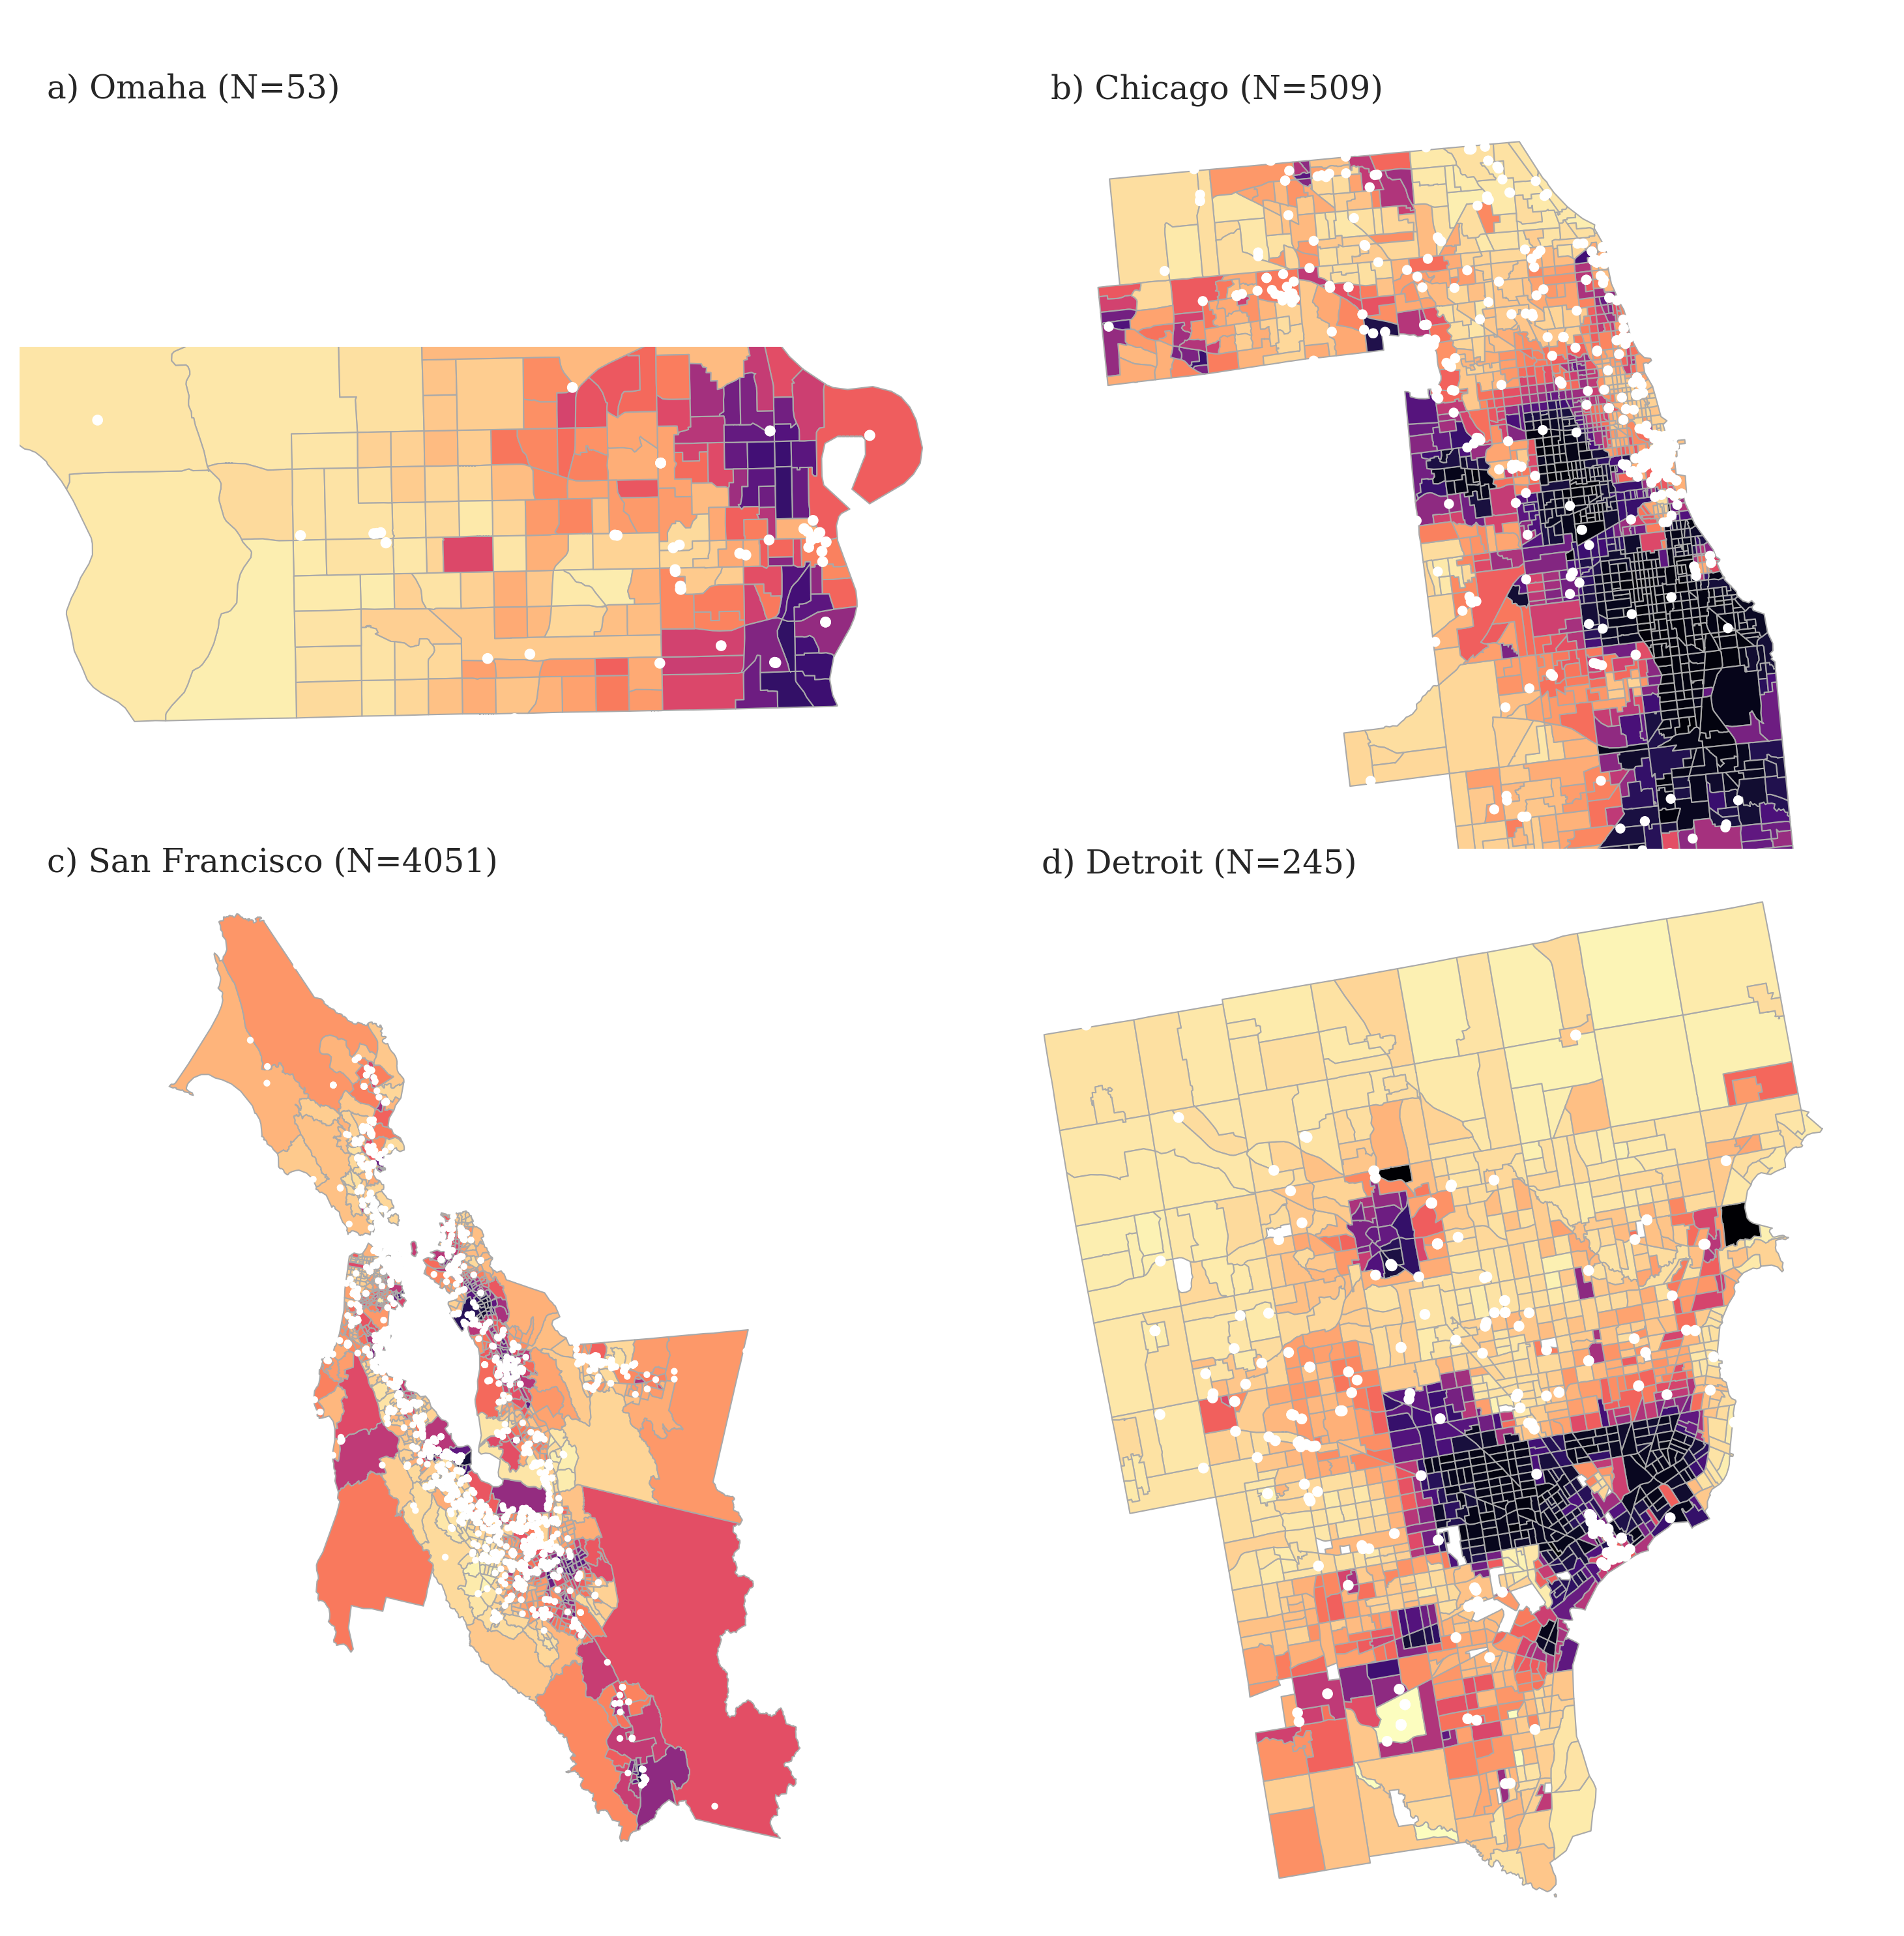

In [11]:
#| label: fig-equity
#| fig-cap: Charging station locations for four metropolitan regions
if publish:
    gdf_ch_stn = gpd.read_parquet("charge_station_tracts.parquet")
    gdf_pop_tr = gpd.read_parquet("population_tracts.parquet")
    image = Image.open('equity_by_city.png')
    display(image)
else:
    df_pop_tr = pd.read_csv("../Data/Census/Population_Race_Tract/nhgis0008_ds248_2020_tract.csv", encoding='latin-1')
    tract_sf = gpd.read_file("../Data/GIS/cb_2020_us_tract_500k/cb_2020_us_tract_500k.shp")
    tract_sf = tract_sf.to_crs(4326)

    # geometry = [Point(xy) for xy in zip(df_ch_stn.Longitude, df_ch_stn.Latitude)]
    # crs = 4326
    # gdf_ch_stn = gpd.GeoDataFrame(df_ch_stn, crs=crs, geometry=geometry)

    df_pop_tr['GEOID'] = df_pop_tr['GEOID'].map(lambda x: x.lstrip('14000'))
    tract_sf['AFFGEOID'] = tract_sf['AFFGEOID'].map(lambda x: x.lstrip('1400000'))

    gdf_pop_tr = tract_sf.merge(df_pop_tr, left_on = 'AFFGEOID', right_on = 'GEOID', how = 'inner')
    gdf_pop_tr.loc[:,["STATEFP","COUNTYFP"]] = gdf_pop_tr.loc[:,["STATEFP","COUNTYFP"]].astype(int)
    # Minority is hispanic, black, native american, pacific islander, and some other race alone (do not include mixed race for simplicity)
    gdf_pop_tr['Minority_Percent'] = ((gdf_pop_tr['U7C002']+gdf_pop_tr['U7C006']+gdf_pop_tr['U7C007']+gdf_pop_tr['U7C009']+gdf_pop_tr['U7C010'])/gdf_pop_tr['U7C001'])*100
    gdf_pop_tr = gdf_pop_tr[~gdf_pop_tr.Minority_Percent.isnull()]
    gdf_pop_tr.to_parquet("population_tracts.parquet")

    norm = plt.Normalize(0, 100)

# Plotting
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
    fig, axs = plt.subplot_mosaic([["a)","b)"],["c)","d)"]], subplot_kw={'projection':projection}, figsize=(10, 10))
    fig.tight_layout()

    for label, ax in axs.items():
        #
        if label=="a)":
            statefp = [31]
            countyfp = [55]
            size = 3
            y_trans = 1.4
            dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
            label += " Omaha (N={0})".format(dfplot.shape[0])
        elif label=="b)":
            statefp = [17]
            # countyfp = ['031', '043', '197']
            countyfp = [31]
            size = 2.7
            y_trans=-20/72
            dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
            label+=" Chicago (N={0})".format(dfplot.shape[0])
        elif label=="c)":
            statefp = [6]
            countyfp = [75, 81, 41, 1, 85]
            size = 1.5
            y_trans=10/72
            dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
            label+=" San Francisco (N={0})".format(dfplot.shape[0])
        else:
            statefp = [26]
            countyfp = [163, 125, 99]
            size = 3
            y_trans=0
            dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
            label+=" Detroit (N={0})".format(dfplot.shape[0])

        gplt.choropleth(
          gdf_pop_tr[(gdf_pop_tr['STATEFP'].isin(statefp)) & (gdf_pop_tr['COUNTYFP'].isin(countyfp))],
          hue = "Minority_Percent",
          # legend=True,
          # legend_kwargs={'boundaries': (0,100,200,300,400)},
          edgecolor='darkgrey',
          linewidth=.5,
          cmap="magma_r",
          norm = norm,
          zorder = 1,
          ax=ax
        )

        gplt.pointplot(
          dfplot,
          ax = ax,
          color = 'white',
          zorder = 2,
          s = size,
        )
        trans = mtransforms.ScaledTranslation(10/72, y_trans, fig.dpi_scale_trans)
        #ax.title()
        ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
                fontsize='large', verticalalignment='top', fontfamily='serif',
                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

        fig.savefig('equity_by_city.png', bbox_inches='tight', dpi = 300)  

Another useful descriptive comparison between the PEV and charging station markets is shown in @fig-state-compare. PEV sales market share is plotted against charging stations per thousand residents as of 2020. While there appears to be a positive correlation between these infrastructures, there are clearly other factors at play - e.g., observe the difference between California and Vermont. This comparison suggests that there are other factors that drive PEV adoption and it may not be sufficient to simply install EVSE.


In [12]:
#| label: fig-state-compare
#| fig-cap: Charging stations and PEV sales by state in 2020

timeseriesx = []
timeseriesy = []

merged_df = pd.DataFrame(geo_ch_stn)
yearpop = 2019
year = 2020

merged_year = merged_df.loc[merged_df.YEAR < yearpop]

num_stations_by_state = merged_year['State'].value_counts()

num_stations_by_state = pd.DataFrame(num_stations_by_state)
num_stations_by_state = num_stations_by_state.reset_index()
num_stations_by_state.columns = ['STATE','Charging Stations']

drop = ["PR", "ON"]

num_stations_by_state = num_stations_by_state[num_stations_by_state.STATE.isin(drop) == False]

ev_market_share = pd.read_csv("../Data/Transport/BEV-PHEV-HEV-FCEV-ICE-Sales-By State-2011-2020-EVAdoption-7.13.21.csv")

stations_vs_marketshare = pd.merge(df_pop, num_stations_by_state, left_on= "STATE", right_on="STATE", how = "right")
stations_vs_marketshare = pd.merge(stations_vs_marketshare, ev_market_share, left_on= "Geographic Area", right_on="State", how = "left")

stations_vs_marketshare['stations_cap'] = (stations_vs_marketshare['Charging Stations']/stations_vs_marketshare[str(yearpop)])*1000
stations_vs_marketshare['ev_share'] = stations_vs_marketshare['EV (BEV & PHEV) Share']*100

share_v_stations_plot = sns.scatterplot(
    data = stations_vs_marketshare,
    x="stations_cap", y="ev_share",
)
share_v_stations_plot.set_xlabel("Charging Stations per Thousand Persons")
share_v_stations_plot.set_ylabel("PEV Sales Market Share")
share_v_stations_plot.set(xlim=(0, 0.4))
share_v_stations_plot.set(ylim=(0, 10))
share_v_stations_plot.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100.0))


# Just for fun
state_labels = ["California", "Vermont", "Colorado", "District of Columbia","Washington", "Hawaii"]
i = 0
# for state in stations_vs_marketshare['Geographic Area']:
for state in state_labels:
    x = stations_vs_marketshare.loc[stations_vs_marketshare['Geographic Area'] == state, 'stations_cap'].iloc[0]
    y = stations_vs_marketshare.loc[stations_vs_marketshare['Geographic Area'] == state, 'ev_share'].iloc[0]
    if state=="Hawaii":
        share_v_stations_plot.text(x + 0.005, y - 0.5 , state)
    else:    
        share_v_stations_plot.text(x + 0.005, y - 0.001 , state)
    timeseriesx.append([])
    timeseriesy.append([])
    timeseriesx[i].append(x)
    timeseriesy[i].append(y)

    i = i + 1
    
plt.show()

<Figure size 432x288 with 1 Axes>

## Phasing Causality


In [13]:
if not publish:
    def adf_test(df):
        result = adfuller(df.values)
        print('ADF Statistics: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

    def kpss_test(df):    
        statistic, p_value, n_lags, critical_values = kpss(df.values)

        print(f'KPSS Statistic: {statistic}')
        print(f'p-value: {p_value}')
        print(f'num lags: {n_lags}')
        print('Critial Values:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')

    print('ADF Test: BEV time series')
    adf_test(us_tot['bev_cap'])
    print('ADF Test: cEVSE_cap time series')
    adf_test(us_tot['cEVSE_cap'])

    print('KPSS Test: BEV time series')
    kpss_test(us_tot['bev_cap'])
    print('KPSS Test: cEVSE_cap time series')
    kpss_test(us_tot['cEVSE_cap'])

Before conducting the phasing causality tests, we applied Augmented Dickey-Fuller (ADF) and Kwiatkouski-Phillips-Schmidt-Shin (KPSS) tests for stationarity to the aggregated US time series and its first differenced analogue. In both cases, it was found that the time series is non-stationary. ADF and KPSS tests were also iteratively applied to each county time series with similar results.


In [14]:
if not publish:
    us_tot_diff = us_tot.diff().dropna()
    print('ADF Test: BEV transformed time series')
    adf_test(us_tot_diff['bev_cap'])
    print('ADF Test: cEVSE_cap transformed time series')
    adf_test(us_tot_diff['cEVSE_cap'])

A limitation to the machine learning-based causality tests is that they require large datasets to perform inference on a highly non-stationary time series, as we found to be the case here. Five annual data points is insufficient to run the tests. We overcome this barrier by leveraging the spatio-temporal nature of our dataset. The strategy is to consider each county as a slice of a spatio-temporal series. We select only the 2020 data and assume that charging stations and EV registrations in that year may be affected by their corresponding observations in previous years but not observations in other counties. This approach effectively defines a spatio-temporal series with a maximum lag of four units (lagged 2018, 2016, 2014, and 2012 observations) plus an instantaneous effect (the 2020 observation). @fig-lags illustrates the concept for five randomly selected counties.


In [15]:
#| label: fig-lags
#| fig-cap: Spatio-temporal lag illustration for five random counties
np.random.seed(seed=98765)
plt.style.use('seaborn-white')
GEOID_list = np.random.choice(pd.unique(gdf.GEOID),size=5,replace=False)
sub_df = gdf[gdf.GEOID.isin(GEOID_list)]
sub_df = sub_df.groupby(["GEOID","YEAR"]).sum().reset_index()
sub_df["pev_cap"] = (sub_df["pev"]/sub_df["ALUBE001"])*100000
sub_df["cEVSE_cap"] = ((sub_df["cEVSE-L01"]+sub_df["cEVSE-L02"]+sub_df["cEVSE-L03"])/sub_df["ALUBE001"])*100000
ymin = 0
ymax = 600 # maximum pev_cap value
ymax2 = 250 # maximum cEVSE_cap value

fig, ax = plt.subplots()
for i, j in enumerate(GEOID_list):
    x = sub_df[sub_df.GEOID==j].YEAR+i*12
    y1 = sub_df[sub_df.GEOID==j].pev_cap
    y2 = sub_df[sub_df.GEOID==j].cEVSE_cap

    ax2 = ax.twinx()
    ax.axes.yaxis.set_visible(False)
    ax2.axes.yaxis.set_visible(False)
    ax.set_ylim([ymin, ymax])
    ax2.set_ylim([ymin, ymax2])
    
    if i==0:
        ln1 = ax.plot(x, y1, '-b', label='PEVs')
        ln2 = ax2.plot(x,y2, '--r', label="Charging stations")
        ax2.grid(False)  
    else:
        ax.plot(x, y1, '-b', label='PEVs')
        ax2.plot(x,y2, '--r', label="Charging stations")
    ax.annotate('County {0}'.format(i+1), 
             xy=(0.05+i*0.2, -0.25), # these are the coordinates to position the label
             xycoords='axes fraction') # you can pass any extra params too
    
ax.set_xticks([2012, 2016, 2020, 2024, 2028, 2032, 2036, 2040, 2044, 2048, 2052, 2056, 2060, 2064, 2068])
ax.set_xticklabels([i for i in range(2012,2021,4)]*5, rotation = 45)
ax.set_xlabel('Year')
plt.show()

<Figure size 432x288 with 6 Axes>

In [16]:
# # Neither time series is stationary for any state
# state_list = pd.unique(df.STATE)
# 
# for st in state_list:
#   st_tot = df[df.STATE==st].groupby("year").sum().reset_index()
#   st_tot["bev_cap"] = (st_tot["bev"]/st_tot["ALUBE001"])*100000
#   st_tot["cEVSE_cap"] = ((st_tot["cEVSE-L01"]+st_tot["cEVSE-L02"]+st_tot["cEVSE-L03"])/st_tot["ALUBE001"])*100000
#   #print('ADF Test: BEV time series for {0}'.format(st))
#   adf_test(st_tot['bev_cap']);
#   #print('ADF Test: cEVSE_cap time series for {0}'.format(st))
#   adf_test(st_tot['cEVSE_cap']);

In [17]:
# def run_nonlin(data_train, data_test, max_lag):
#     results = nonlincausalityMLP(x=data_train, maxlag=max_lag, Dense_layers=2, Dense_neurons=[100, 100], x_test=data_test, run=1, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     results_ARIMA = nonlincausalityARIMA(x=data_train, maxlag=max_lag, x_test=data_train)
#     
#     results_GRU = nonlincausalityGRU(x=data_train, maxlag=max_lag, GRU_layers=2, GRU_neurons=[25, 25], Dense_layers=2, Dense_neurons=[100, 100], x_test=data_test, run=3, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     results_LSTM = nonlincausalityLSTM(x=data_train, maxlag=max_lag, LSTM_layers=2, LSTM_neurons=[25, 25], Dense_layers=2, Dense_neurons=[100, 100], x_test=data_test, run=3, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     results_NN = nonlincausalityNN(x=data_train, maxlag=max_lag, NN_config=["l", "dr", "g", "dr", "d", "dr"], NN_neurons=[5, 0.1, 5, 0.1, 5, 0.1], x_test=data_test, run=3, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     #%% Example of obtaining the results
#     lags = [1,2,3,4,5]
#     models = ["MLP","ARIMA","GRU","LSTM","NN"]
#     index = pd.MultiIndex.from_tuples(list(itertools.product(models, lags)), names=["model", "lag"])
#     granger_df = pd.DataFrame(index=index,columns=["cohens_d","test_stat","p_value"])
#     
#     for name, res in {"MLP":results, "ARIMA":results_ARIMA, "GRU":results_GRU, "LSTM":results_LSTM, "NN":results_NN}.items():
#     
#         for lag in lags:
#             p_value = res[lag].p_value
#             test_stat = res[lag].test_statistic
#     
#             best_errors_X = res[lag].best_errors_X
#             best_errors_XY = res[lag].best_errors_XY
#     
#             cohens_d = np.abs(
#                 (np.mean(np.abs(best_errors_X)) - np.mean(np.abs(best_errors_XY)))
#                 / np.std([best_errors_X, best_errors_XY])
#             )
#             print("For lag = %d Cohen's d = %0.3f" % (lag, cohens_d))
#             print(f"test statistic = {0} p-value = {1}".format(test_stat,p_value))
#             granger_df.loc[(name,lag),"cohens_d"] = cohens_d
#             granger_df.loc[(name,lag),"test_stat"] = test_stat
#             granger_df.loc[(name,lag),"p_value"] = p_value
#     return granger_df
# 
# lag = 5 # number of years
# 
# cty_list = pd.unique(df.GEOID)
# train_cty, test_cty = np.split(cty_list, [int(len(cty_list)*0.7)])
# data_train = df.loc[df.GEOID.isin(train_cty),["pev_cap","cEVSE_cap"]].values
# data_test = df.loc[df.GEOID.isin(test_cty),["pev_cap","cEVSE_cap"]].values
# 
# # Run assuming PEV registrations cause charging station installations
# run_nonlin(data_train,data_test,lag).to_csv("granger_df_pev_ch.csv")
# 
# data_train = df.loc[df.GEOID.isin(train_cty),["cEVSE_cap","pev_cap"]].values
# data_test = df.loc[df.GEOID.isin(test_cty),["cEVSE_cap","pev_cap"]].values
# 
# # Run assuming PEV registrations cause charging station installations
# run_nonlin(data_train,data_test,lag).to_csv("granger_df_ch_pev.csv")
# 
# data_train = df.loc[df.GEOID.isin(train_cty),["cEVSE_cap_lag","pev_cap"]].values
# data_test = df.loc[df.GEOID.isin(test_cty),["cEVSE_cap_lag","pev_cap"]].values
# 
# # Run assuming PEV registrations cause charging station installations - using lagged data
# run_nonlin(data_train,data_test,lag).to_csv("granger_df_ch_pev_lag.csv")

We perform the non-linear causality tests using MLP, LSM, GRU, and ARIMA models, with resulted summarized in @tab-phasing-tests. Given that charging station data can be aggregated to annual totals in every year, we also test both one and two year lags alternatively considering charging stations and EV registrations as the causal impetus. That is, we consider 2012, 2014, 2016, 2018, and 2020 station totals and 2011, 2015, 2017, and 2019 station totals causing PEV registrations in the five available years, then add 2021 station totals and consider PEV registrations as causing charging station deployments. None of these analyses gives definitive support for either causal mechanisms. These results indicate a feedback relationship between the two variables of interest. While our spatio-temporal approach allows us to perform these statistical tests, it does not allow us to test for feedback effects because the underlying time series remains too short.

Granger [@granger1969] notes that the speed of information flow is an important factor in causal phasing, as well as the data sampling frequency. He suggests that results may differ depending upon if analysis is conducted at an annual, quarterly, or monthly frequency. However, the electric transportation market does not change fast enough pace for sub-annual variation to be significant. Two pertinent factors to consider are that vehicles tend to be kept for many years and a single charging station is unlikely to incentive widespread EV purchases in a county. As such, it is unlikely that individuals respond to charging station investments at a sub-annual frequency and this frequency is deemed acceptable.


In [18]:
#| label: tab-phasing-tests
# Load in the Granger causality results and create a table from it
df_gr_pev_ch = pd.read_csv("granger_df_pev_ch.csv")
df_gr_ch_pev = pd.read_csv("granger_df_ch_pev.csv")
df_gr_ch_pev_lag = pd.read_csv("granger_df_ch_pev_lag.csv")
df_gr_pev_ch_lag = pd.read_csv("granger_df_pev_ch_lag.csv")
df1 = df_gr_pev_ch.merge(df_gr_ch_pev,how="left",on=["model","lag"],suffixes=("_pc","_cp"))
df2 = df_gr_ch_pev_lag.merge(df_gr_pev_ch_lag,how="left",on=["model","lag"],suffixes=("_pcl","_cpl"))
df1 = df1.merge(df2,how="left",on=["model","lag"])
# Filter out columns where none of the cohens_d are significant
df1 = df1[(df1.p_value_pc<0.05) | (df1.p_value_cp<0.05) | (df1.p_value_pcl<0.05) | (df1.p_value_cpl<0.05)]

# Style the table
def bold_sig(v, p_val_col = "", props='', threshold=0.05):
    if p_val_col not in df1:
        return np.full(v.shape, "")
    return np.where(df1[p_val_col].le(threshold), props, "")

df1.sort_values(by=["model","lag"],inplace=True)
df1.rename(columns={"model":"Model","lag":"Lag","cohens_d_pc":"(1)", "cohens_d_cp":"(2)","cohens_d_pcl":"(3)","cohens_d_cpl":"(4)"}, inplace=True)
df1.style.apply(bold_sig, p_val_col="p_value_pc", props="font-weight: bold;", subset=( "(1)"), axis=0, threshold=0.05) \
.apply(bold_sig, p_val_col="p_value_cp", props="font-weight: bold;", subset=( "(2)"), axis=0, threshold=0.05) \
.apply(bold_sig, p_val_col="p_value_pcl", props="font-weight: bold;", subset=( "(3)"), axis=0, threshold=0.05) \
.apply(bold_sig, p_val_col="p_value_cpl", props="font-weight: bold;", subset=( "(4)"), axis=0, threshold=0.05) \
.hide(subset=["p_value_pc","p_value_cp","p_value_pcl","p_value_cpl"], axis="columns") \
.hide(axis="index").format(precision=3) \
.highlight_max(subset=["(1)","(2)","(3)","(4)"], color='grey', axis=0, props=None)

Model,Lag,(1),(2),(3),(4)
ARIMA,1,0.012,0.031,0.027,0.030
ARIMA,2,0.010,0.029,0.026,0.026
ARIMA,3,0.013,0.018,0.025,0.031
ARIMA,4,0.005,0.025,0.016,0.024
ARIMA,5,0.000,0.018,0.010,0.005
GRU,1,0.131,0.199,0.156,0.258
LSTM,1,0.240,0.231,0.133,0.035
LSTM,2,0.211,0.157,0.101,0.357
LSTM,3,0.196,0.069,0.145,0.062
LSTM,5,0.144,0.094,0.102,0.264


## GPS-Based Potential Outcomes Causality

Given the inconclusive phasing causality results, we maintain the assumption that charging stations cause PEV registrations in subsequent analysis. This section first presents the GPS model results that are input into the GAM dose-response model. We then provide the dose-response results, followed by mediation model results.

### GPS Model Results

The GPS model includes spatially lagged charging stations per 100,000 persons in adjacent counties, the portion of the population that identifies as a minority, median household income in \$10,000, and state-year fixed effects (omitted from @tab-gps-results). As expected, we find that charging stations in adjacent counties are correlated with more charging stations in the home county. Counties with higher minority population shares tend to have lower charging station access. Income is found to have a negative effect on charging station access. At first glance, this is an unintuitive result because we tend to see more amenities in higher income communities. A plausible reason for this result is that higher income counties tend to have larger homes in which residents can charge their vehicles, thus reducing the need for public charging stations. As illustrated in @fig-equity, charging stations are concentrated in urban counties that tend to have lower median incomes than their surrounding suburban counties. The pump price parameter has the expected positive sign, indicative of more charging stations when and where conventional fuel prices are high.


In [19]:
gps = GPS_Regressor(verbose=False)
check = gdf[gdf.YEAR==2020]
T = gdf['cEVSE_cap']
y = gdf['pev_cap']
# Covariates are spatial lag charging stations, state FE, percent minority, and income in $1000
X = pd.concat([gdf.xW,gdf.filter(like="sy_",axis=1),gdf.Percent_Minority,gdf.ABDPE001/1000, gdf.price_2020],axis=1)
#X = pd.concat([check.Percent_Minority,check.ABDPE001/1000],axis=1)

gps.fit(T=T, X = X, y=y);
gps_results = gps.calculate_CDRC(0.95)

In [20]:
#| label: tab-gps-results
mr = gps.gps_results
df_mod = pd.concat([mr.params,mr.tvalues],axis=1)
df_mod.columns = ["est.","t-stat"]
filt_idx = df_mod[df_mod.index.str.contains("sy_")].index
df_mod.rename(index={"xW":"Lagged charging stations","ABDPE001":"Household income ($10,000)","Percent_Minority":"Percent minority", "price_2020":"Pump gas price (2020$)"}, inplace=True)
df_mod.style.hide(subset=filt_idx, axis="index").format({'est.': "{:.2}","t-stat":"{:.2f}"})

,est.,t-stat
Lagged charging stations,0.019,13.05
Percent minority,-8.2,-1.42
"Household income ($10,000)",-0.29,-4.87
Pump gas price (2020$),3.7,1.07


## Dose-Response Model Results

@fig-dose-response confirms the hypothesis that charging station access encourages individuals to purchase PEVs. However, the encouragement tends to become less effective at higher charging station penetration rates. In fact, it becomes negative in the region around 100 charging stations per 100,000 persons when controlling for other covariates. This result fits our finding in @fig-state-compare that California has the highest PEV sales market share despite several other states having more charging stations per capita.


In [21]:
#| label: fig-dose-response
#| fig-cap: Dose-response curve for charging stations and PEV registrations
def plot_mean_and_CI(ax, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    ax.fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    ax.plot(treatment, mean, color_mean, linewidth=0.75)

fig, ax = plt.subplots()
    
treat = gps_results['Treatment']
mean = gps_results['Causal_Dose_Response']
lb = gps_results['Lower_CI']
ub = gps_results['Upper_CI']
plot_mean_and_CI(ax, treat, mean, lb, ub, color_mean='b', color_shading='b')

# Labels
ax.set_ylabel('PEVs per 100 Thousand Persons ');
ax.set_xlabel('Charging stations per 100 Thousand Persons');

<Figure size 432x288 with 1 Axes>

## Mediation Effect Results

Mediation plots are shown in @fig-med-co2 and @fig-med-elect for grid CO_2e intensity and Democratic vote share, respectively. The mediation plots show the proportion of the effect from each treatment variable that is caused by the mediating effect of charging stations. In the case of CO_2e emissions rate, charging stations account for roughly 18% of the effect for most states. However, in the states with the highest emissions intensities there are either very few registered PEVs (no effect from either charging stations or grid CO_2e intensity) or PEV registrations are driven by charging stations investments despite a high CO2e emissions intensity state grid. These results suggest that lowering grid emissions tends to increase PEV registrations, but it is also feasible to encourage minimal PEV adoption with a highly emitting grid via investments in charging station infrastructure.


In [22]:
if not publish:
    med = Mediation(
        bootstrap_draws=500,
        bootstrap_replicates=100,
        spline_order=3,
        n_splines=5,
        random_seed=111,
        verbose=False,
        #treatment_grid_num=4
    )

    med.fit(
        T=gdf["STC2ERTA"],
        M=gdf["cEVSE_cap"],
        y=gdf["pev_cap"],
    )

    med_results = med.calculate_mediation(ci = 0.95)

In [23]:
if not publish:
    # Use cubic interpolation to create plot of relationship between charging station rate and the proportion of democratic votes
    f = interp1d(med_results['Treatment_Value'], med_results['Proportion_Indirect_Effect'], kind='cubic', bounds_error=False, fill_value=0)
    PIR_grid = np.linspace(0, 2120, num=100, endpoint=True)

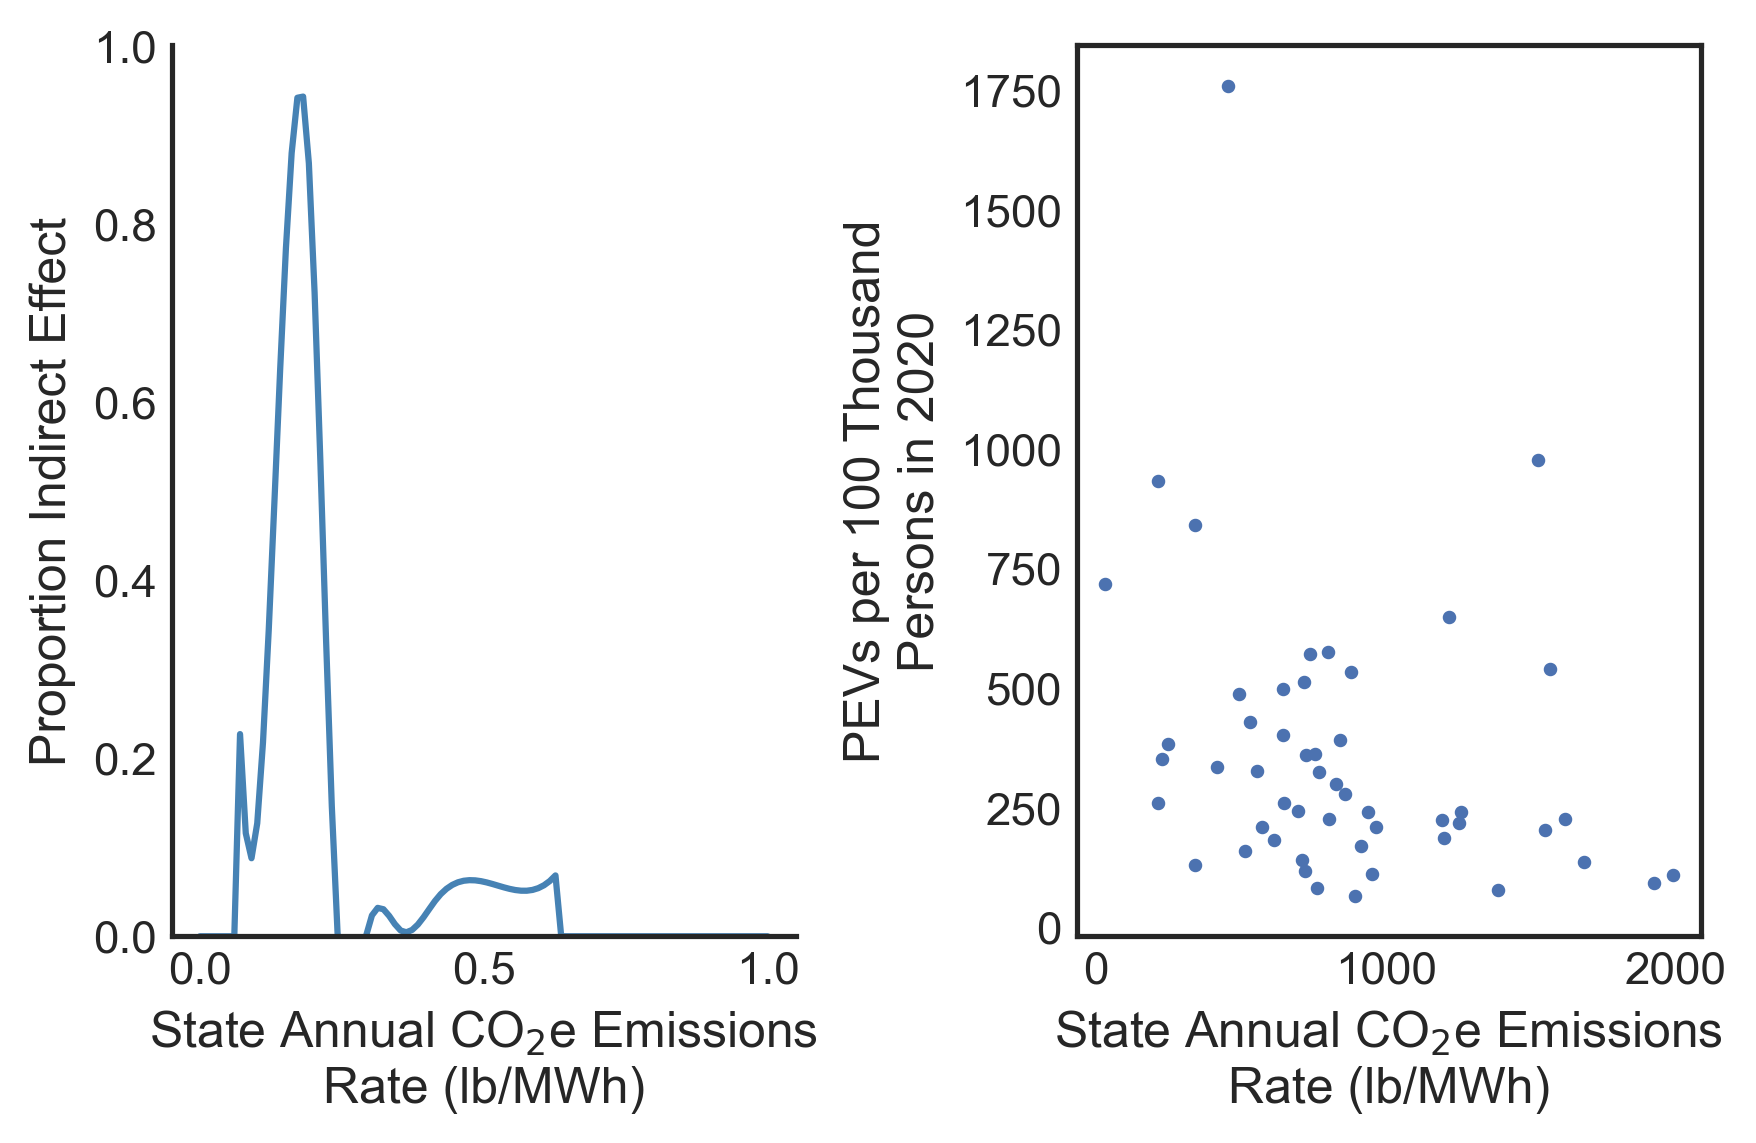

In [24]:
#| label: fig-med-co2
#| fig-cap: Mediation results for CO2
if publish:
    image = Image.open('mediation_curve_co2.png')
    display(image)
else:
    st_tot = gdf[gdf.YEAR==2020].groupby(["STATE"]).agg({'STC2ERTA':'mean', 'pev': 'sum', 'ALUBE001': 'sum'}).reset_index()
    st_tot.pev_cap = (st_tot["pev"]/st_tot["ALUBE001"])*100000
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.plot(PIR_grid, f(PIR_grid), color = 'steelblue')
    ax1.spines["top"].set_visible(False)  
    ax1.spines["right"].set_visible(False)  
    ax1.get_xaxis().tick_bottom()  
    ax1.get_yaxis().tick_left()
    ax1.set_ylabel('Proportion Indirect Effect')
    ax1.set_xlabel('State Annual CO2e Emissions\nRate (lb/MWh)')
    ax1.set_ylim(0,1)
    ax1.tick_params(axis='both', which='major')
    ax2.scatter(st_tot.STC2ERTA, st_tot.pev_cap,s=5)
    ax2.set_ylabel('PEVs per 100 Thousand\nPersons in 2020')
    ax2.set_xlabel('State Annual CO2e Emissions\nRate (lb/MWh)')
    fig.tight_layout()
    plt.savefig('mediation_curve_co2.png', bbox_inches='tight', dpi = 300)

In [25]:
if not publish:
    med = Mediation(
        bootstrap_draws=500,
        bootstrap_replicates=100,
        spline_order=3,
        n_splines=5,
        random_seed=111,
        verbose=False,
        #treatment_grid_num=4
    )

    med.fit(
        T=gdf["percent_dem"],
        M=gdf["cEVSE_cap"],
        y=gdf["pev_cap"],
    );

    med_results = med.calculate_mediation(ci = 0.95)

In [26]:
if not publish:
    # Use cubic interpolation to create plot of relationship between charging station rate and the proportion of democratic votes
    f = interp1d(med_results['Treatment_Value'], med_results['Proportion_Indirect_Effect'], kind='cubic', bounds_error=False, fill_value=0)
    PIR_grid = np.linspace(0, 1, num=100, endpoint=True)

Democratic vote share is mediated by EVSE infrastructure only in the lowest share range. Similar to highly emitting grids, it appears that EVSE investments can mediate the effect of political affiliation on PEV registrations. However, the PEV adoption rates tend to be low in these counties.


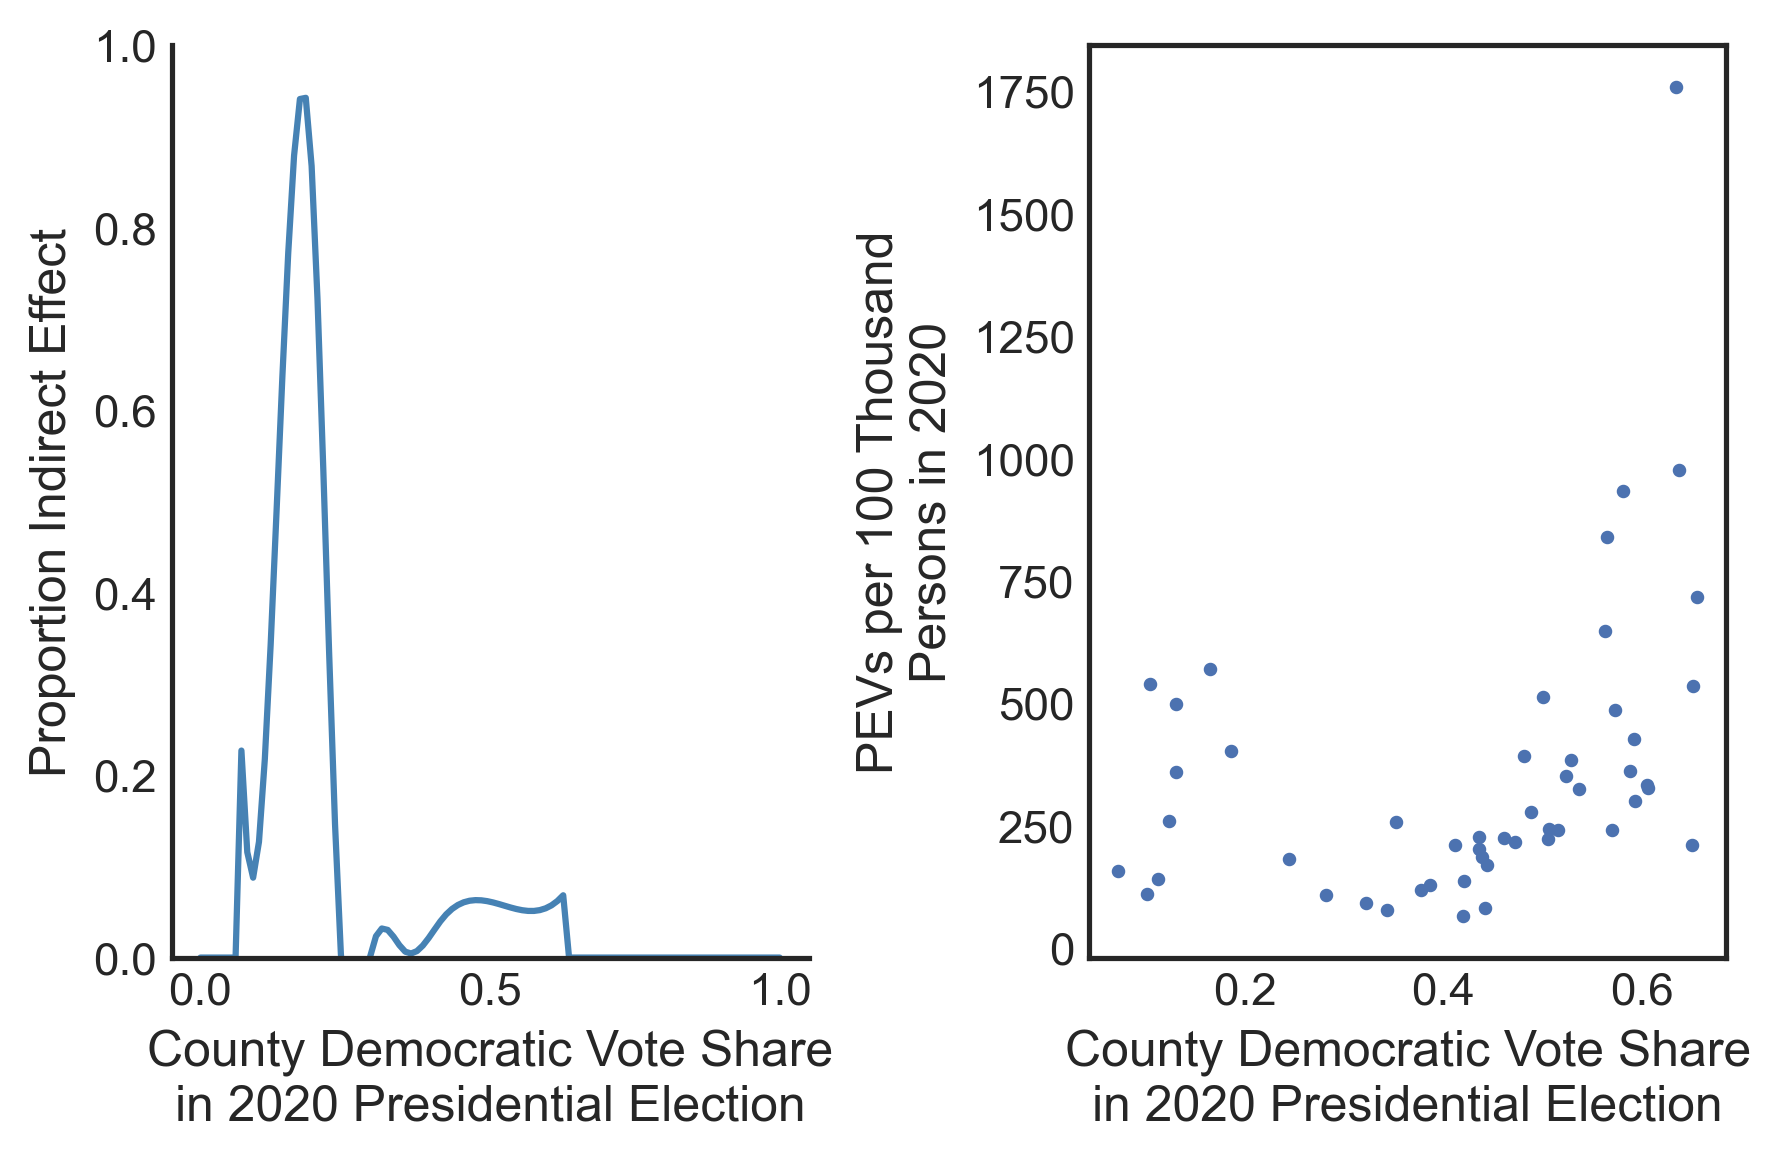

In [27]:
#| label: fig-med-elect
#| fig-cap: Mediation results for 2020 presidential election returns
if publish:
    image = Image.open('mediation_curve_elections.png')
    display(image)
else:
    st_tot = gdf[gdf.YEAR==2020].groupby(["STATE"]).agg({'CAND_VOTES':'sum', 'TOT_VOTES':'sum', 'pev': 'sum', 'ALUBE001': 'sum'}).reset_index()
    st_tot.pev_cap = (st_tot["pev"]/st_tot["ALUBE001"])*100000
    st_tot.percent_dem = st_tot.CAND_VOTES/st_tot.TOT_VOTES
    fig, (ax1,ax2) = plt.subplots(1,2)  
    ax1.plot(PIR_grid, f(PIR_grid), color = 'steelblue')
    ax1.spines["top"].set_visible(False)  
    ax1.spines["right"].set_visible(False)  
    ax1.get_xaxis().tick_bottom()  
    ax1.get_yaxis().tick_left()
    ax1.set_ylabel('Proportion Indirect Effect')
    ax1.set_xlabel('County Democratic Vote Share\nin 2020 Presidential Election')
    ax1.set_ylim(0,1)
    ax1.tick_params(axis='both', which='major')    
    ax2.scatter(st_tot.percent_dem, st_tot.pev_cap,s=5)
    ax2.set_ylabel('PEVs per 100 Thousand\nPersons in 2020')
    ax2.set_xlabel('County Democratic Vote Share\nin 2020 Presidential Election')
    fig.tight_layout()
    plt.savefig('mediation_curve_elections.png', bbox_inches='tight', dpi = 300)

In [28]:
if not publish:
    gam = gps.gam_results
    for i, term in enumerate(gam.terms):
        if term.isintercept:
            continue

        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

        plt.figure()
        plt.plot(XX[:, term.feature], pdep)
        plt.plot(XX[:, term.feature], confi, c='r', ls='--')
        plt.title(repr(term))
        plt.show()

In [29]:
# state_fips_to_abbrev = {"st__1":"AL","st__2":"AK","st__4":"AZ","st__5":"AR","st__6":"CA","st__8":"CO","st__9":"CT","st__10":"DE","st__11":"DC","st__12":"FL","st__13":"GA","st__15":"HI","st__16":"ID","st__17":"IL","st__18":"IN","st__19":"IA","st__20":"KS",
#                         "st__21":"KY","st__22":"LA","st__23":"ME","st__24":"MD","st__25":"MA","st__26":"MI","st__27":"MN","st__28":"MS","st__29":"MO","st__30":"MT","st__31":"NE","st__32":"NV","st__33":"NH","st__34":"NJ","st__35":"NM","st__36":"NY",
#                         "st__37":"NC","st__38":"ND","st__39":"OH","st__40":"OK","st__41":"OR","st__42":"PA","st__44":"RI","st__45":"SC","st__46":"SD","st__47":"TN","st__48":"TX","st__49":"UT","st__50":"VT","st__51":"VA","st__53":"WA","st__54":"WV",
#                         "st__55":"WI","st__56":"WY","st__60":"AS","st__66":"GU","st__69":"MP","st__72":"PR","st__78":"VI"}

In [30]:
# temp = df_mod["est."].filter(like="st_")
# temp.index = temp.index.map(state_fips_to_abbrev)
# #temp["AL"] = 0
# ax = temp.plot(kind="bar")
# # Labels
# ax.set_ylabel('State Fixed Effect');
# ax.set_xlabel('State');

# Discussion and Conclusions

A key climate change policy challenge in the transportation sector is how to transition the private vehicle fleet to PEVs. As in many product markets, there is an indirect network effect between household goods purchases and the supply of complementary infrastructure. Zhou and Li [@zhou2018] found a critical mass hurdle may exist in the PEV market, beyond which PEV sales may revert to a no-adoption outcome. Their analysis was based on 2011-2013 data, which we are able to expand upon by making use of an updated and longer time series. We find that many US counties (239 out of 3273 as of 2020) have no registered PEVs (measured as the number of battery-electric and plug-in hybrid electric vehicles). Among those counties that have seen PEV adoption, there is a clear pattern of concurrent charging station installations. We are unable to confirm a causal phasing between the two actions using non-linear Granger causality-type testing. It appears there is a feedback relationship whereby PEVs are purchased and in response suppliers install charging stations, and vice versa. There also appears to be an equilibrium point, an ESCE penetration rate beyond which PEV adoption does not increase absent supporting policies and incentives - see the comparison between California and Vermont in @fig-state-compare. Despite progress in some regions, PEV adoption and EVSE infrastructure in most of the country is limited as of 2020. The high rate of zero valued observations in these datasets suggests that PEV adoption and infrastructure networks are still more concentrated. This concentration decreased in the time period of the study, but still remained high in 2020.

In addition to the lack of findings from the causality models, the GPS model returned significant findings on the affects of race on charging station access. There is a correlation between counties with higher representations of racial minorities and a lower rate of charging stations. There were no significant findings on the effects of income. The dose-response model finds that charging station access encourages PEV adoption up until a certain point, then PEV adoption becomes discouraged by increasing charging stations. Furthermore, the mediation effect results, which studied grid emissions and Democratic voter share per county, showed that both of these effects are mediated by charging station infrastructure at higher levels of emissions and Democratic voter share.

We find support for the Biden administration's focus on equitable distribution of charging infrastructure within regions. Historically segregated cities (e.g., Chicago and Detroit) lack EVSE in their predominantly minority communities, while appearing to have an overabundance of EVSE in their peripheral suburbs. There are also inequities across regions. The Great Plains has very little charging station infrastructure built, as seen by Omaha where EVSE is sparse outside its downtown.

Several updates are proposed to the propensity score function. Despite progress in some regions, PEV adoption and EVSE infrastructure in most of the country is limited as of 2020. As such, there is a high proportion of zero-valued observations. The linear GPS function could be replaced by a Tobit specification, which would capture the zero inflation as a censoring process. The current GPS function also treats observations from the same county as independent. An autoregressive specification could be explored that would match observations across counties but treat sequential observations for the same county as a common unit. Both changes are planned for a future iteration of this work.